In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('../data/raw/autorenew.csv',parse_dates=['dateCrawled','dateCreated','lastSeen'])

In [152]:
df.head()

,dateCrawled,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


### eliminar duplicados

In [153]:
df = df.drop_duplicates()

### eliminar columnas

In [154]:
columnas_eliminar = ['dateCrawled','dateCreated','lastSeen','seller','offerType','model','monthOfRegistration','nrOfPictures','postalCode']

In [155]:
df = df.drop(columns=columnas_eliminar)

In [156]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manually,0.0,150000,petrol,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manually,187.0,125000,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,161.0,125000,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda,no


## limpieza de datos

In [157]:
df.columns.tolist()

['name',
 'price',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerCV',
 'kilometer',
 'fuelType',
 'brand',
 'notRepairedDamage']

### columnas PRICE

1.- Valores NULOS

In [158]:
df['price'].isnull().sum()

np.int64(0)

2.- Valores por debajo del umbral normal del campo de 100 o superiores a 4.000.000

In [159]:
umbral_inferior = 100
umbral_superior = 4e6

In [160]:
porcentaje_inferior =(df['price']< umbral_inferior).mean() * 100
print(f'Porcentaje de valores por debajo del umbral inferior: {porcentaje_inferior:.3f} %')

Porcentaje de valores por debajo del umbral inferior: 3.585 %


In [161]:
porcentaje_superior =(df['price'] > umbral_superior).mean() * 100
print(f'Porcentaje de valores por encima del umbral superior: {porcentaje_superior:.3f} %')

Porcentaje de valores por encima del umbral superior: 0.014 %


In [162]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manually,0.0,150000,petrol,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manually,187.0,125000,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,161.0,125000,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda,no


3.- Ver registros con umbrales

In [163]:
df[df['price'] > umbral_superior]

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
14663,Tausch_moeglich_Polo_vw_n9,11111111,coupe,2003,manually,63.0,150000,petrol,volkswagen,NaN
20746,Golf3_Schlachtfest,12345678,NaN,1995,NaN,0.0,150000,NaN,volkswagen,NaN
21467,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,9999999,coupe,1967,manually,212.0,50000,petrol,porsche,no
39625,Tausche_volvo_v40_gegen_van,12345678,NaN,2018,manually,94.0,150000,NaN,volvo,no
54295,Mazda_5_2.0_CD_DPF_Exclusive,10000000,bus,2007,manually,141.0,150000,diesel,mazda,no
54507,Tausch_DKW_F8_gegen_Lanz_Bulldog,11111111,other,1953,manually,20.0,150000,NaN,audi,no
56973,tausche_ford_mondeo_mk3_ghia_gegen_anderes_auto,99999999,NaN,2002,manually,129.0,150000,NaN,ford,NaN
69747,Suche_Mercedes_Benz_r_klasse_cdi,99999999,bus,2006,NaN,0.0,150000,diesel,mercedes_benz,NaN
77520,Tausch_gegen_gleichwertiges,99999999,NaN,1999,automatic,221.0,150000,petrol,mercedes_benz,NaN
87799,Leasinguebernahme,27322222,NaN,2014,manually,161.0,40000,diesel,citroen,NaN


4.- Filtramos datos 

In [164]:
filtro_precio = (df['price'] > umbral_inferior) & (df['price'] < umbral_superior)
filtro_precio_entre = df['price'].between(umbral_inferior, umbral_superior)    
df = df[filtro_precio_entre]
print(df.shape)

(358152, 10)


In [165]:
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manually,0.0,150000,petrol,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manually,187.0,125000,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,161.0,125000,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0.0,20000,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatic,100.0,125000,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manually,101.0,150000,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,3400,combi,2002,manually,99.0,150000,diesel,volkswagen,NaN


### año registro

1.Valores mayores 2019

In [179]:
(df['yearOfRegistration'] > 2019).value_counts()

yearOfRegistration
True    81
Name: count, dtype: int64

In [180]:
df = df[df['yearOfRegistration'] > 2019]

In [181]:
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
16657,quad_neu_t?v_tauschen_gegen_Auto,1700,NaN,3200,NaN,0.0,5000,NaN,sonstige_autos,NaN
18121,Opel_GT_Karosserie_mit_Brief!,700,NaN,9999,NaN,0.0,10000,NaN,opel,NaN
18196,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,6500,NaN,8888,NaN,0.0,10000,NaN,sonstige_autos,NaN
19160,Renault_Twingo,300,NaN,2200,NaN,0.0,5000,NaN,renault,NaN
21133,Kompressor,1600,NaN,4100,NaN,0.0,5000,NaN,sonstige_autos,NaN
...,...,...,...,...,...,...,...,...,...,...
337891,RENNWAGEN_GRUPPE_F,15000,NaN,5000,NaN,153.0,5000,petrol,volkswagen,NaN
338189,Chevrolet_Camaro_Z28_Cabrio,25500,NaN,5000,manually,424.0,5000,NaN,chevrolet,NaN
342422,Golf_1_75ps_5911km_Original_Automatik,7999,NaN,5911,automatic,74.0,10000,NaN,volkswagen,NaN
344415,Mazda_6_GH__2008_Alufelgen_mit_Brereifung,450,NaN,2500,NaN,0.0,5000,NaN,mazda,NaN


2. Filtro años inferior a 2019

In [182]:
df['yearOfRegistration'] <= 1950

16657     False
18121     False
18196     False
19160     False
21133     False
          ...  
337891    False
338189    False
342422    False
344415    False
351235    False
Name: yearOfRegistration, Length: 81, dtype: bool

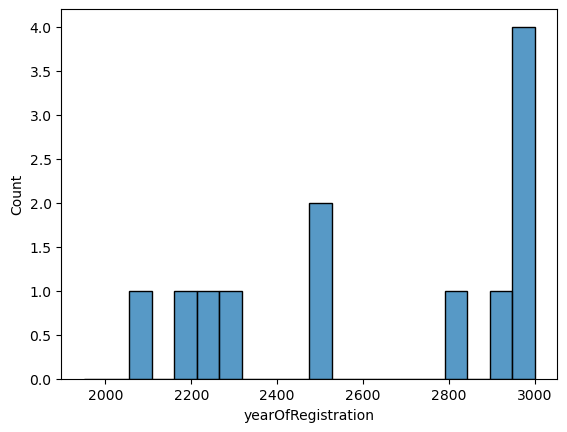

In [195]:
    plt.figure()
    sns.histplot(df['yearOfRegistration'],bins=20,binrange=(1950,3000))
    plt.show()

In [210]:
umbral_fecha = 3000

In [211]:
df[df['yearOfRegistration'] < umbral_fecha].sample(5)

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
268359,VW_GOLF_2_SYNCRO,1700,NaN,2800,manually,97.0,5000,petrol,volkswagen,NaN
146559,Hallo_ich__bin_auf_der_Suche_nach_ein_vw_Touran,3500,NaN,2500,NaN,0.0,5000,diesel,volkswagen,NaN
19160,Renault_Twingo,300,NaN,2200,NaN,0.0,5000,NaN,renault,NaN
231388,Suche_Auto_mit_TÜV_bis_100_€,100,NaN,2222,NaN,0.0,5000,NaN,sonstige_autos,NaN
48979,Einzelstueck_zu_verkaufen,5000,NaN,2900,manually,118.0,5000,petrol,opel,NaN


### cv

Potencia mayor de 1200 cv no exsten, convertimos a NULOS

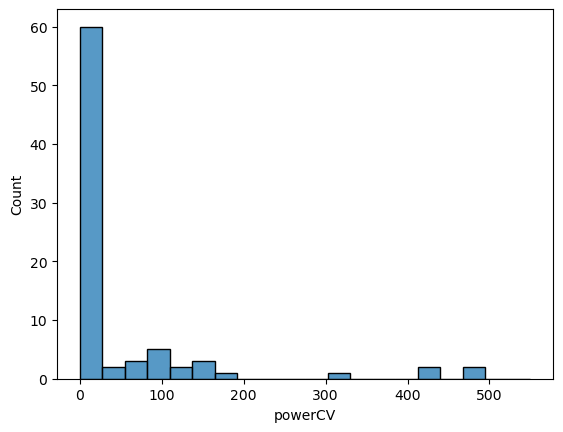

In [214]:
umbral_superior_cv = 550
plt.figure()
sns.histplot(df['powerCV'],bins=20,binrange=(0,umbral_superior_cv))
plt.show()


In [220]:
df[df['powerCV'] < umbral_superior_cv].shape

(81, 10)

In [222]:
df = df[df['powerCV'] < umbral_superior_cv]
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
16657,quad_neu_t?v_tauschen_gegen_Auto,1700,NaN,3200,NaN,0.0,5000,NaN,sonstige_autos,NaN
18121,Opel_GT_Karosserie_mit_Brief!,700,NaN,9999,NaN,0.0,10000,NaN,opel,NaN
18196,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,6500,NaN,8888,NaN,0.0,10000,NaN,sonstige_autos,NaN
19160,Renault_Twingo,300,NaN,2200,NaN,0.0,5000,NaN,renault,NaN
21133,Kompressor,1600,NaN,4100,NaN,0.0,5000,NaN,sonstige_autos,NaN
...,...,...,...,...,...,...,...,...,...,...
337891,RENNWAGEN_GRUPPE_F,15000,NaN,5000,NaN,153.0,5000,petrol,volkswagen,NaN
338189,Chevrolet_Camaro_Z28_Cabrio,25500,NaN,5000,manually,424.0,5000,NaN,chevrolet,NaN
342422,Golf_1_75ps_5911km_Original_Automatik,7999,NaN,5911,automatic,74.0,10000,NaN,volkswagen,NaN
344415,Mazda_6_GH__2008_Alufelgen_mit_Brereifung,450,NaN,2500,NaN,0.0,5000,NaN,mazda,NaN


Sustu.iimos el valor 0 por NULOS en cv

In [235]:
df['powerCV'] = df['powerCV'].apply(lambda x: np.nan if x < 40 else x)
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
16657,quad_neu_t?v_tauschen_gegen_Auto,1700,NaN,3200,NaN,NaN,5000,NaN,sonstige_autos,NaN
18121,Opel_GT_Karosserie_mit_Brief!,700,NaN,9999,NaN,NaN,10000,NaN,opel,NaN
18196,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,6500,NaN,8888,NaN,NaN,10000,NaN,sonstige_autos,NaN
19160,Renault_Twingo,300,NaN,2200,NaN,NaN,5000,NaN,renault,NaN
21133,Kompressor,1600,NaN,4100,NaN,NaN,5000,NaN,sonstige_autos,NaN
...,...,...,...,...,...,...,...,...,...,...
337891,RENNWAGEN_GRUPPE_F,15000,NaN,5000,NaN,153.0,5000,petrol,volkswagen,NaN
338189,Chevrolet_Camaro_Z28_Cabrio,25500,NaN,5000,manually,424.0,5000,NaN,chevrolet,NaN
342422,Golf_1_75ps_5911km_Original_Automatik,7999,NaN,5911,automatic,74.0,10000,NaN,volkswagen,NaN
344415,Mazda_6_GH__2008_Alufelgen_mit_Brereifung,450,NaN,2500,NaN,NaN,5000,NaN,mazda,NaN
